# Challenge: Iterate and evaluate your classifier

It's time to revisit your classifier from the previous assignment. Using the evaluation techniques we've covered here, look at your classifier's performance in more detail. Then go back and iterate by engineering new features, removing poor features, or tuning parameters. Repeat this process until you have five different versions of your classifier. Once you've iterated, answer these questions to compare the performance of each:

- Do any of your classifiers seem to overfit?
- Which seem to perform the best? Why?
- What features seemed to be most impactful to performance?

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# A first attempt

In [47]:
imdb = pd.read_csv('C:\\Users\\User\\Documents\\Python_scripts\\Thinkful\\imdb_labelled.txt', sep= '\t', header=None)
print(imdb.shape)

# Rename columns and set everything to lower case
imdb.rename(columns={0:'Texts', 1:'Positive'}, inplace=True)
imdb['Texts'] = imdb['Texts'].str.lower()

# Copies of original imdb dataset for later
imdb2 = imdb
imdb3 = imdb

(748, 2)


In [48]:
imdb.head()

,Texts,Positive
0,"a very, very, very slow-moving, aimless movie ...",0
1,not sure who was more lost - the flat characte...,0
2,attempting artiness with black & white and cle...,0
3,very little music or anything to speak of.,0
4,the best scene in the movie was when gerardo i...,1


In [49]:
# A man of few words...
goodwords = ['good', 'great', 'beautiful', 'perfect', 'best', 'greatest', 'enjoy', 'laugh',
             'funny', 'cry', 'cried', 'action', 'gripping', 'cool', 'like']
             
badwords = ['not worth', 'not good', 'not great', 'don’t like', 'didn’t like', 'boring', 
            'don’t recommend', 'average', 'long', 'bad', 'gross',
            'waste', 'slow', 'drag']


# A column for each word
for word in goodwords:
    imdb[word] = imdb['Texts'].str.contains(" " + word + " ")

for word in badwords:
    imdb[word] = imdb['Texts'].str.contains(" " + word + " ")

print(imdb.shape)

(748, 31)


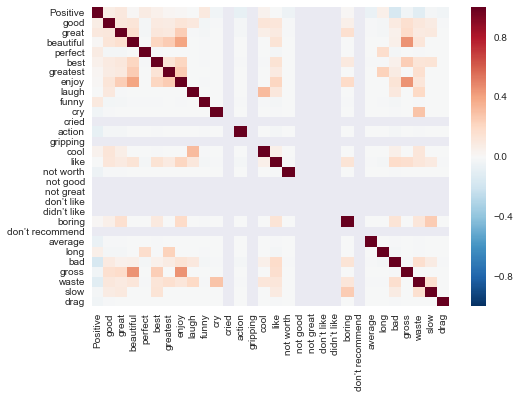

In [50]:
sns.heatmap(imdb.corr())
plt.show()

A couple of correlations, particularly between 'best', 'greatest', 'enjoy' (dropping 'enjoy' probably best way to solve this). Strangly 'gross' is positively correlated with 'beautiful', 'enjoy', and 'best'. 'Waste' is slightly correlated with 'good', 'great' as its arguably picking up the parts of 'not good' and 'not great'?

Some negative correlations too, between 'not good', 'not great', 'don't like', and 'didn't like'.

Keeping it all for now...

In [51]:
# Data is binomial, therefore use Bernoulli
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(imdb.loc[:,'good':'drag'], imdb['Positive'])

# Testing prediction against entire dataset
y_hat = bnb.predict(imdb.loc[:,'good':'drag'])

#Drumroll... The model is 
print("Number of mislabeled points out of a total {} points : {}".format(
    imdb.shape[0],
    (imdb['Positive'] != y_hat).sum()))

from sklearn.metrics import confusion_matrix
confused = confusion_matrix(imdb['Positive'], y_hat)
TP = confused[0][0]
FP = confused[0][1]
FN = confused[1][0]
TN = confused[1][1]

sensitive = TP/(TP+FN)
specificity = TN/(TN+FP)
print(sensitive)
print(specificity)

Number of mislabeled points out of a total 748 points : 316
0.896551724138
0.550724637681


...only slightly better than a coin toss. High on sensitivity (but this is because dominant strategy just to call Ham for everything). Low on specificity.

# Slightly more words

In [52]:
# Maybe some more words this time

goodwords = ['good', 'great', 'beautiful', 'perfect', 'best', 'greatest', 'enjoy', 'laugh',
             'funny', 'cry', 'cried', 'action', 'gripping', 'cool', 'like', 'delightfull', 
            'gem', 'worth', 'classic', 'treat', 'love']
             
badwords = ['not worth', 'not good', 'not great', 'don’t like', 'didn’t like', 'boring', 
            'don’t recommend', 'average', 'long', 'bad', 'gross', 'awful',
            'slow', 'suck', 'sucked', 'hate','waste', 'drag']

# A column for each word
for word in goodwords:
    imdb2[word] = imdb2['Texts'].str.contains(" " + word + " ")

for word in badwords:
    imdb2[word] = imdb2['Texts'].str.contains(" " + word + " ")

print(imdb.shape)

bnb = BernoulliNB()
bnb.fit(imdb2.loc[:,'good':'drag'], imdb2['Positive'])

# Testing prediction against entire dataset
y_hat = bnb.predict(imdb2.loc[:,'good':'drag'])

#Drumroll...
print("Number of mislabeled points out of a total {} points : {}".format(
    imdb2.shape[0],
    (imdb2['Positive'] != y_hat).sum()))

confused = confusion_matrix(imdb2['Positive'], y_hat)

TP = confused[0][0]
FP = confused[0][1]
FN = confused[1][0]
TN = confused[1][1]

sensitive = TP/(TP+FN)
specificity = TN/(TN+FP)
print(sensitive)
print(specificity)

(748, 41)
Number of mislabeled points out of a total 748 points : 316
0.896551724138
0.550724637681


That did not improve matters at all.

## Throwing the dictionary at it

In [53]:
# Going for overfit by loading positive, negative sentiment lists

positivelist = pd.read_csv('positive-words.txt', sep='\n', comment=';')
print(positivelist.shape)

(2006, 1)


In [46]:
positivelist.head()

,a+
0,abound
1,abounds
2,abundance
3,abundant
4,accessable


In [54]:
# Creating lots of columns on imdb3 (copy of original)
wordlist = positivelist['a+']

for word in wordlist:
    imdb3[word] = imdb3['Texts'].str.contains(" " + word + " ")


# Skipping the check on correlation (2000*2000 matrix isn't going to be useful anyway)


#Setting up the model
bnb = BernoulliNB()
bnb.fit(imdb3.iloc[:,2:], imdb3['Positive'])

# Testing prediction against entire dataset
y_hat = bnb.predict(imdb3.iloc[:, 2:])

#Drumroll...
print("Number of mislabeled points out of a total {} points : {}".format(
    imdb3.shape[0],
    (imdb3['Positive'] != y_hat).sum()))

confused = confusion_matrix(imdb3['Positive'], y_hat)

TP = confused[0][0]
FP = confused[0][1]
FN = confused[1][0]
TN = confused[1][1]

sensitive = TP/(TP+FN)
specificity = TN/(TN+FP)
print(sensitive)
print(specificity)

Number of mislabeled points out of a total 748 points : 159
0.713684210526
0.915750915751


Okay, 3 of this is enough me-thinks. Also avoiding doing cross-validation and sample splitting.

# So to answer the question

- Do any of your classifiers seem to overfit?

Yes, it is likely that the final model was overfitting (only 700-odd observations and 2000 features!). It is also likely that the independence assumption is violated for this model. 

- Which seem to perform the best? Why?

Final model, but that's cause I included just about every positive word available in English.

- What features seemed to be most impactful to performance?

Picking words which actually relate to movie descriptions.
